In [1]:
import pickle
import numpy as np
import rewardpredictive as rp
import rlutils as rl
import matplotlib.pyplot as plt
from pathlib import Path
from rewardpredictive.mdp import RandomRewardChange, mdp_goal_dist, FixedTerminalRewardChange

from matplotlib import rc
rc('font', **{'family': 'serif', 'size': 16})
rc('text', usetex=True)

from definitions import ROOT_DIR

results_directory = 'SingleChangeMaze'
# title = u'$L1 > 10$'
title = u'$L1 > 10$'

ql = rp.ExperimentSetTaskSequenceRandomRewardChangeQLearning.load(base_dir=f'./data/{results_directory}')
qt = rp.ExperimentSetTaskSequenceRandomRewardChangeQTransfer.load(base_dir=f'./data/{results_directory}')
sfl = rp.ExperimentSetTaskSequenceRandomRewardChangeSFLearning.load(base_dir=f'./data/{results_directory}')
sft = rp.ExperimentSetTaskSequenceRandomRewardChangeSFTransfer.load(base_dir=f'./data/{results_directory}') 
sfta = rp.ExperimentSetTaskSequenceRandomRewardChangeSFTransferAll.load(base_dir=f'./data/{results_directory}')


In [2]:
# FILTERING
for sf in [sfl, sft, sfta]:
    new_experiment_list = []
    for i, exp in enumerate(sf.experiment_list):
        if exp.hparam['lr_r'] <= 0.5 and exp.hparam['lr_sf'] <= 0.5:
            new_experiment_list.append(exp)
    sf.experiment_list = new_experiment_list

for q in [ql, qt]:
    new_experiment_list = []

    for i, exp in enumerate(q.experiment_list):
        if exp.hparam['lr'] <= 0.5:
            new_experiment_list.append(exp)
    q.experiment_list = new_experiment_list


In [3]:
ql.experiment_list[0].results['avg_reward']

[array([[-3.00000004e+00, -8.30000012e+00, -3.70000006e+00,
         -3.80000006e+00,  3.89999998e+00, -1.20000002e+00,
         -2.90000004e+00, -4.00000006e+00, -2.60000004e+00,
         -2.00000003e+00,  1.69999995e+00, -1.50000002e+00,
          3.89999998e+00, -6.00000009e-01, -6.00000009e-01,
         -1.20000002e+00, -1.20000002e+00, -4.80000007e+00,
          4.70000000e+00, -8.00000012e-01, -1.10000002e+00,
          3.69999998e+00, -1.50000002e+00,  2.99999997e+00,
         -1.70000003e+00, -3.60000005e+00,  4.70000000e+00,
          4.70000000e+00,  4.09999999e+00,  4.70000000e+00,
          4.70000000e+00,  4.49999999e+00,  4.70000000e+00,
          4.49999999e+00,  4.70000000e+00, -1.80000003e+00,
          4.70000000e+00,  4.70000000e+00,  4.70000000e+00,
          4.70000000e+00,  4.49999999e+00,  4.70000000e+00,
          4.70000000e+00,  4.70000000e+00,  4.70000000e+00,
          4.70000000e+00,  4.70000000e+00,  4.70000000e+00,
          4.70000000e+00,  4.49999999e+0

In [4]:
metric = 'avg_reward'  # NOTE! This is labeled incorrectly - it should be TOTAL reward.
print('Q-learning')
exp_ql = ql.get_best_experiment(exploration='egreedy', task_sequence='significant', metric=metric, better='max') 
print('Q-learning with Q-value transfer')
exp_qt = qt.get_best_experiment(exploration='egreedy', task_sequence='significant', metric=metric, better='max')  
print('SF-transfer')
exp_sft = sft.get_best_experiment(exploration='egreedy', task_sequence='significant', metric=metric, better='max')  
print('SF-learning')
exp_sfl = sfl.get_best_experiment(exploration='egreedy', task_sequence='significant', metric=metric, better='max')  
print('SF-learning with SF and rew transfer')
exp_sfta = sfta.get_best_experiment(exploration='egreedy', task_sequence='significant', metric=metric, better='max')  

# Set up some preliminary variables used for plotting
episodes_per_task = exp_ql.results['episode_length'][0].shape[-1]
runs_per_task = len(exp_ql.results['episode_length'])
num_tasks = exp_ql.results['episode_length'][0].shape[0]
tasks = np.arange(num_tasks)

Q-learning
repeats: 30
task_sequence: significant
exploration: egreedy
episodes: 200
epsilon: 0.1
gamma: 0.99
mdp_size: 8
num_tasks: 2
lr: 0.3
change_maze_per_run: True
Q-learning with Q-value transfer
repeats: 30
task_sequence: significant
exploration: egreedy
episodes: 200
epsilon: 0.1
gamma: 0.99
mdp_size: 8
num_tasks: 2
lr: 0.5
change_maze_per_run: True
SF-transfer
repeats: 30
task_sequence: significant
exploration: egreedy
episodes: 200
epsilon: 0.1
gamma: 0.99
mdp_size: 8
num_tasks: 2
lr_sf: 0.5
lr_r: 0.1
change_maze_per_run: True
SF-learning
repeats: 30
task_sequence: significant
exploration: egreedy
episodes: 200
epsilon: 0.1
gamma: 0.99
mdp_size: 8
num_tasks: 2
lr_sf: 0.5
lr_r: 0.1
change_maze_per_run: True
SF-learning with SF and rew transfer
repeats: 30
task_sequence: significant
exploration: egreedy
episodes: 200
epsilon: 0.1
gamma: 0.99
mdp_size: 8
num_tasks: 2
lr_sf: 0.3
lr_r: 0.5
change_maze_per_run: True


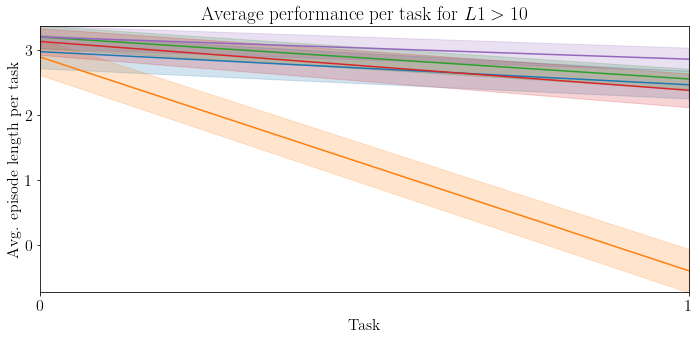

In [11]:
total_reward_qlearning = np.mean(np.array(exp_ql.results[metric]), axis=-1)
total_reward_qtransfer = np.mean(np.array(exp_qt.results[metric]), axis=-1)
total_reward_sflearning = np.mean(np.array(exp_sfl.results[metric]), axis=-1)
total_reward_sftransfer = np.mean(np.array(exp_sft.results[metric]), axis=-1)
total_reward_sftransferall = np.mean(np.array(exp_sfta.results[metric]), axis=-1)

plt.figure(figsize=(10, 5))

rl.plot.mean_with_sem(tasks, total_reward_qlearning, axis=0, color='C0', label='Q-Learning')
rl.plot.mean_with_sem(tasks, total_reward_qtransfer, axis=0, color='C1', label='Q-Learning\nwith Transfer')
rl.plot.mean_with_sem(tasks, total_reward_sflearning, axis=0, color='C2', label='SF-Learning')
rl.plot.mean_with_sem(tasks, total_reward_sftransfer, axis=0, color='C4', label='SF-Transfer')
rl.plot.mean_with_sem(tasks, total_reward_sftransferall, axis=0, color='C3', label='SF-Learning\nwith Transfer All')

_, _, y_bottom, y_top = plt.axis()
# for i in tasks[1:]:
#     plt.plot([i, i], [y_bottom, y_top], c='k', alpha=0.1)
#     plt.text(i - 0.32, y_top - 275, all_distances[i], alpha=0.6)
# plt.ylim([10, 35])

def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

plt.title(f'Average performance per task for {title}')
plt.ylabel('Total rewards per task')
plt.xlabel('Task')
plt.xticks(tasks)
# leg = plt.legend(loc=1, ncol=2, frameon=True)
# export_legend(leg)
plt.margins(x=0)
plt.margins(y=0)
# leg.get_frame().set_linewidth(0.0)
plt.tight_layout()
plt.savefig(f'figure/{results_directory}_simple.svg', bbox_inches='tight', pad_inches=0.1, transparent=True)

In [14]:
from scipy.stats import sem
{
    "Q-Learning": {
        'mean': total_reward_qlearning[:, -1].mean(),
        'std_err': sem(total_reward_qlearning[:, -1])
    },
    "Q-Transfer": {
        'mean': total_reward_qtransfer[:, -1].mean(),
        'std_err': sem(total_reward_qtransfer[:, -1])
    },
    "SF-Transfer": {
        'mean': total_reward_sftransfer[:, -1].mean(),
        'std_err': sem(total_reward_sftransfer[:, -1])
    },
    "SF-Learning": {
        'mean': total_reward_sflearning[:, -1].mean(),
        'std_err': sem(total_reward_sflearning[:, -1])
    },
    "SF-TransferAll": {
        'mean': total_reward_sftransferall[:, -1].mean(),
        'std_err': sem(total_reward_sftransferall[:, -1])
    },
}

{'Q-Learning': {'mean': 2.462449985495458, 'std_err': 0.21080328414912305},
 'Q-Transfer': {'mean': -0.40093335905174415, 'std_err': 0.3345254809560092},
 'SF-Transfer': {'mean': 2.8564999876916404, 'std_err': 0.1767042928410863},
 'SF-Learning': {'mean': 2.552183318862071, 'std_err': 0.15651745853476645},
 'SF-TransferAll': {'mean': 2.377233322016895, 'std_err': 0.26036106240008766}}

In [15]:
(2.8564999876916404 - 0.1767042928410863) - (2.377233322016895 + 0.26036106240008766)

0.042201310433571226